In [30]:
push!(Base.LOAD_PATH, "../../.")
using Pkg
Pkg.activate("../.")

  Activating project at `~/Documents/code/julia/CompFin/notebooks`


In [31]:
using CompFin: HeatEquation, solve_pde

In [32]:
# Setup

xmin = 0.0;
xmax = 10.0;
nx = 100;
tmin = 0.0;
tmax = 1.0;
nt = 200;

dt = (tmax - tmin)/nt;
dx = (xmax - xmin)/nx;
t = dt*collect(0:nt);
x = dx*collect(0:nx);

alpha = 1.0
init_cond = x -> (x - xmin)*(xmax - x);
left_bound = t -> 0;
right_bound = t -> 0;

heat_eq = HeatEquation(alpha, init_cond, left_bound, right_bound);

In [33]:
# is the explicit scheme stable?
print(alpha*dt/(dx^2))
alpha*dt/(dx^2) < 0.5

0.4999999999999999

true

In [34]:
u = solve_pde(heat_eq, xmin, xmax, nx, tmin, tmax, nt)

201×101 Matrix{Float64}:
 0.0  0.99      1.96     2.91     3.84     …  2.91     1.96     0.99      0.0
 0.0  0.98      1.95     2.9      3.83        2.9      1.95     0.98      0.0
 0.0  0.975     1.94     2.89     3.82        2.89     1.94     0.975     0.0
 0.0  0.97      1.9325   2.88     3.81        2.88     1.9325   0.97      0.0
 0.0  0.96625   1.925    2.87125  3.8         2.87125  1.925    0.96625   0.0
 0.0  0.9625    1.91875  2.8625   3.79063  …  2.8625   1.91875  0.9625    0.0
 0.0  0.959375  1.9125   2.85469  3.78125     2.85469  1.9125   0.959375  0.0
 0.0  0.95625   1.90703  2.84688  3.7725      2.84687  1.90703  0.95625   0.0
 0.0  0.953516  1.90156  2.83977  3.76375     2.83977  1.90156  0.953516  0.0
 0.0  0.950781  1.89664  2.83266  3.75555     2.83266  1.89664  0.950781  0.0
 ⋮                                         ⋱                              ⋮
 0.0  0.778596  1.55604  2.3312   3.10293     2.3312   1.55604  0.778596  0.0
 0.0  0.778021  1.5549   2.32949  3.10067

In [35]:
using Plots

In [36]:
function plot_diffusion(u::Matrix{Float64}, x::Vector{Float64}, t::Vector{Float64}; fps=15)
    a = Animation()
    plt = surface(title="Heat equation", xlim=(minimum(x), maximum(x)), ylim=(minimum(t), maximum(t)), zlim=(minimum(u), maximum(u)), xlabel="x", ylabel="t", zlabel="u", c=:afmhot)
    for i = 1:length(t)
        plt = surface(x, t[1:i], u[1:i, :], title="Heat equation", xlim=(minimum(x), maximum(x)), ylim=(minimum(t), maximum(t)), zlim=(minimum(u), maximum(u)), xlabel="x", ylabel="t", zlabel="u", c=:afmhot)
        frame(a, plt)
    end
        
    gif(a, fps=fps)
end

plot_diffusion (generic function with 1 method)

┌ Info: Saved animation to /tmp/jl_lePSh8ZcD4.gif
└ @ Plots /home/martin/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_lePSh8ZcD4.gif")
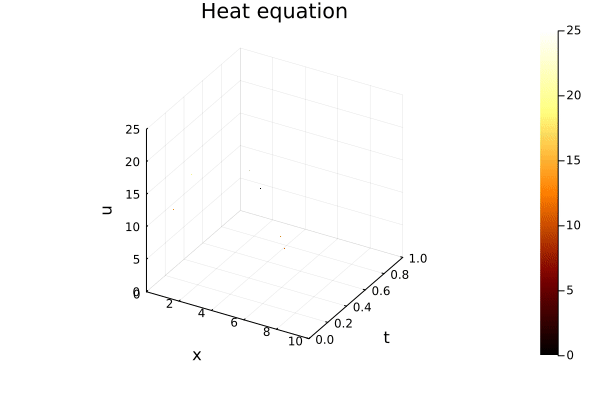

In [37]:
plot_diffusion(u, x, t)